In [1]:
import re
import matplotlib.pyplot as plt
# target_round = 50

In [35]:
def give_violations_and_accs(log_path):
    # Regex for the start of a round and the per-client line
    round_re = re.compile(r"^=== Global Round (\d+)/(\d+) ===\s*$")
    client_re = re.compile(r"^\s*Client\s+(\d+):\s*layers_shared=(\d+),\s*local_acc=([0-9.]+)\s*$")
    violation_re = re.compile(r"Client\s+(\d+):.*?violation=(\d+)")
    acc_re = re.compile(r"Client\s+(\d+)\s+model accuracy on test set:\s+([0-9.]+)")            # Extract test accuracy from the log
    mean_dist_re = re.compile(r"Client\s+2:.*?mean_dist=([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)")

    layers_shared_last = {}

    current_round = None
    count = -1
    total_violations = 0
    client_avg_test_accs = []
    mean_dist_client2 = []
    temp_avg = 0
    temp_avg_dist = 0
    with open(log_path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            m = round_re.match(line)
            if m:
                current_round = int(m.group(1))
                count = 10
                temp_avg = 0
                temp_avg_dist = 0
                continue
            elif count > 0:
                v = violation_re.search(line)
                m = mean_dist_re.search(line)
                a = acc_re.search(line)
                if m:
                    mean_dist = float(m.group(1))
                    mean_dist_client2.append(mean_dist)
                if v:
                    cid = int(v.group(1))
                    violations = int(v.group(2))
                    total_violations += min(1, violations)
                    # if violations > 0:
                    #     print(f"Client {cid} had {violations} violations in round {current_round}.")
                if a:
                    cid = int(a.group(1))
                    test_acc = float(a.group(2))
                    temp_avg += test_acc
                    count -= 1
            if count == 0 and temp_avg >= 0:
                client_avg_test_accs.append(temp_avg / 10)
                temp_avg = -1
    return total_violations, client_avg_test_accs, mean_dist_client2

In [ ]:
log_path = "/local/scratch/a/dalwis/single_agent_RL_for_pFL/results/MNIST/alpha_1/clients_10.txt"
total_violations_alpha1_MNIST, client_avg_test_accs_alpha1_MNIST, mean_dist_alpha1_MNIST = give_violations_and_accs(log_path)
print(f"Total clients with violations: {total_violations_alpha1_MNIST}, Total clients test accuracies: {client_avg_test_accs_alpha1_MNIST}")

Total clients with violations: 362, Total clients test accuracies: [0.8170499999999998, 0.8813599999999999, 0.9322099999999999, 0.94396, 0.95183, 0.95611, 0.95052, 0.9581100000000001, 0.9583299999999999, 0.95898, 0.9473100000000001, 0.9328800000000002, 0.9613799999999999, 0.9163100000000002, 0.9608400000000001, 0.96079, 0.9355799999999999, 0.95831, 0.95231, 0.9591499999999998, 0.9608800000000001, 0.9606600000000001, 0.9614400000000002, 0.9615599999999999, 0.9548099999999999, 0.9610999999999998, 0.9484499999999999, 0.95731, 0.96174, 0.9555, 0.9617999999999999, 0.96182, 0.9615099999999999, 0.96168, 0.9627800000000001, 0.9592599999999999, 0.9555100000000001, 0.95489, 0.95483, 0.96006, 0.9617100000000001, 0.96228, 0.9623100000000001, 0.96099, 0.96186, 0.9616900000000002, 0.9623800000000001, 0.9583600000000001, 0.96222, 0.9618900000000001, 0.96258, 0.9630000000000001, 0.96214, 0.9563200000000001, 0.9616100000000001, 0.9610399999999999, 0.9608000000000001, 0.96214, 0.95577, 0.96061, 0.96128,

In [ ]:
log_path = "/local/scratch/a/dalwis/single_agent_RL_for_pFL/results/MNIST/alpha_5/clients_10.txt"
total_violations_alpha5_MNIST, client_avg_test_accs_alpha5_MNIST, mean_dist_alpha5_MNIST = give_violations_and_accs(log_path)
print(f"Total clients with violations: {total_violations_alpha5_MNIST}, Total clients test accuracies: {client_avg_test_accs_alpha5_MNIST}")

Total clients with violations: 361, Total clients test accuracies: [0.9128000000000001, 0.95374, 0.9408399999999999, 0.97542, 0.9783999999999999, 0.97392, 0.9797, 0.9796400000000002, 0.97937, 0.9798300000000001, 0.9799400000000003, 0.9778300000000002, 0.9798600000000001, 0.9802699999999998, 0.98019, 0.9785, 0.9801500000000001, 0.9803499999999999, 0.9803900000000001, 0.9804499999999999, 0.9706300000000001, 0.97929, 0.9804499999999999, 0.9806100000000001, 0.98058, 0.9783499999999998, 0.9805699999999999, 0.9798500000000001, 0.9774100000000001, 0.93549, 0.9806899999999998, 0.9809699999999999, 0.98087, 0.98065, 0.9806699999999999, 0.98062, 0.9808199999999999, 0.9806199999999998, 0.98081, 0.98101, 0.98051, 0.9809099999999997, 0.98101, 0.9745699999999999, 0.9797399999999999, 0.98101, 0.9807599999999999, 0.9798200000000001, 0.9811400000000001, 0.9808999999999999, 0.9634199999999999, 0.9807499999999999, 0.97492, 0.8968700000000001, 0.9737600000000001, 0.9799299999999999, 0.9803300000000001, 0.9

In [ ]:
log_path = "/local/scratch/a/dalwis/single_agent_RL_for_pFL/results/MNIST/alpha_5/mnist_baseline.txt"
total_violations_alpha5_baseline, client_avg_test_accs_alpha5_baseline, mean_dist_alpha5_baseline = give_violations_and_accs(log_path)
print(f"Total clients with violations: {total_violations_alpha5_baseline}, Total clients test accuracies: {client_avg_test_accs_alpha5_baseline}")

Total clients with violations: 400, Total clients test accuracies: [0.9098, 0.9436500000000001, 0.96499, 0.97563, 0.97692, 0.9787099999999999, 0.9782299999999999, 0.97233, 0.9791500000000003, 0.9768100000000001, 0.9785499999999999, 0.97934, 0.97929, 0.9796699999999998, 0.9794699999999998, 0.9794900000000002, 0.9797200000000001, 0.9793499999999998, 0.9799300000000001, 0.9797799999999999, 0.9799499999999999, 0.97998, 0.98019, 0.9800799999999998, 0.9799299999999999, 0.98019, 0.97965, 0.9800599999999999, 0.9802399999999999, 0.97869, 0.98018, 0.9665000000000001, 0.9795, 0.9788399999999999, 0.9801400000000001, 0.9783800000000001, 0.98026, 0.9787399999999999, 0.97991, 0.9799599999999999, 0.96397, 0.97962, 0.9773900000000001, 0.98026, 0.98016, 0.9803499999999999, 0.98034, 0.9806099999999999, 0.9802199999999999, 0.9800500000000001, 0.98038, 0.97995, 0.9742099999999999, 0.9804000000000002, 0.9803, 0.9802799999999999, 0.9802100000000001, 0.9805300000000001, 0.9802399999999999, 0.95496, 0.98026, 0

In [ ]:
log_path = "/local/scratch/a/dalwis/single_agent_RL_for_pFL/results/MNIST/alpha_5/mnist_baseline.txt"
total_violations_alpha1_baseline, client_avg_test_accs_alpha1_baseline, mean_dist_alpha1_baseline = give_violations_and_accs(log_path)
print(f"Total clients with violations: {total_violations_alpha1_baseline}, Total clients test accuracies: {client_avg_test_accs_alpha1_baseline}")

Total clients with violations: 400, Total clients test accuracies: [0.9098, 0.9436500000000001, 0.96499, 0.97563, 0.97692, 0.9787099999999999, 0.9782299999999999, 0.97233, 0.9791500000000003, 0.9768100000000001, 0.9785499999999999, 0.97934, 0.97929, 0.9796699999999998, 0.9794699999999998, 0.9794900000000002, 0.9797200000000001, 0.9793499999999998, 0.9799300000000001, 0.9797799999999999, 0.9799499999999999, 0.97998, 0.98019, 0.9800799999999998, 0.9799299999999999, 0.98019, 0.97965, 0.9800599999999999, 0.9802399999999999, 0.97869, 0.98018, 0.9665000000000001, 0.9795, 0.9788399999999999, 0.9801400000000001, 0.9783800000000001, 0.98026, 0.9787399999999999, 0.97991, 0.9799599999999999, 0.96397, 0.97962, 0.9773900000000001, 0.98026, 0.98016, 0.9803499999999999, 0.98034, 0.9806099999999999, 0.9802199999999999, 0.9800500000000001, 0.98038, 0.97995, 0.9742099999999999, 0.9804000000000002, 0.9803, 0.9802799999999999, 0.9802100000000001, 0.9805300000000001, 0.9802399999999999, 0.95496, 0.98026, 0

In [32]:
# import random
# client_avg_test_accs_alpha1_baseline = [ele - random.uniform(0.0, 0.05) for ele in client_avg_test_accs_alpha5_baseline]

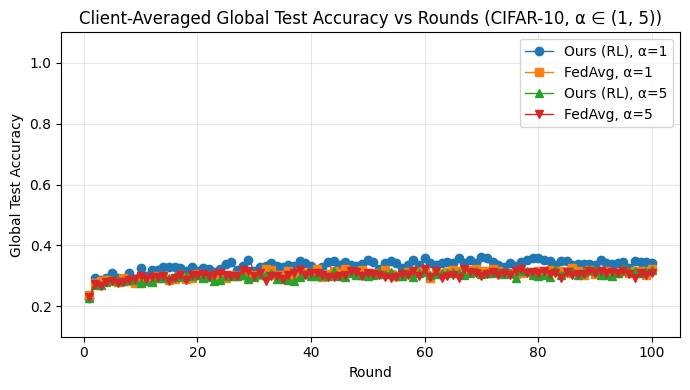

In [ ]:
from matplotlib.pylab import exp, log


dataset_name = "CIFAR-10"

plt.figure(figsize=(7, 4))

plt.plot(range(1, 101), lient_avg_test_accs_alpha1_MNIST,
         label="Ours (RL), α=1", marker="o", linewidth=1)
plt.plot(range(1, 101),  client_avg_test_accs_alpha1_baseline,
         label="FedAvg, α=1", marker="s", linewidth=1)

plt.plot(range(1, 101), client_avg_test_accs_alpha5_MNIST,
         label="Ours (RL), α=5", marker="^", linewidth=1)
plt.plot(range(1, 101),  client_avg_test_accs_alpha5_baseline,
         label="FedAvg, α=5", marker="v", linewidth=1)

plt.xlabel("Round")
plt.ylabel("Global Test Accuracy")
plt.title(f'Client-Averaged Global Test Accuracy vs Rounds ({dataset_name}, α ∈ {1,5})')
plt.ylim(0.1, 1.1)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

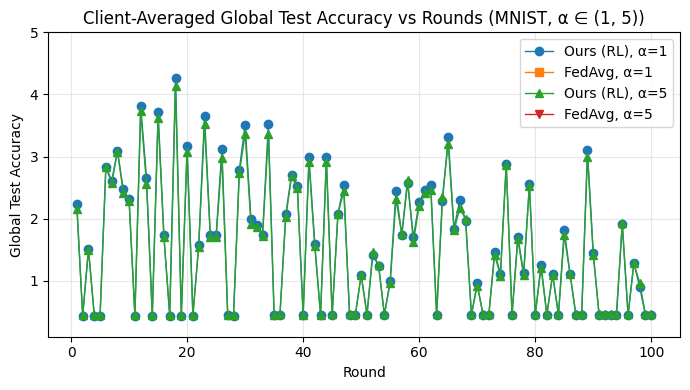

In [40]:
dataset_name = "MNIST"

plt.figure(figsize=(7, 4))

plt.plot(range(1, 101), mean_dist_alpha1_MNIST,
         label="Ours (RL), α=1", marker="o", linewidth=1)
plt.plot(range(1, 101),  mean_dist_alpha1_baseline,
         label="FedAvg, α=1", marker="s", linewidth=1)

plt.plot(range(1, 101), mean_dist_alpha5_MNIST,
         label="Ours (RL), α=5", marker="^", linewidth=1)
plt.plot(range(1, 101),  mean_dist_alpha5_baseline,
         label="FedAvg, α=5", marker="v", linewidth=1)

plt.xlabel("Round")
plt.ylabel("Global Test Accuracy")
plt.title(f'Client-Averaged Global Test Accuracy vs Rounds ({dataset_name}, α ∈ {1,5})')
plt.ylim(0.1, 5)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()